# Importing Libraries and Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Reading the Dataset

In [3]:
data = pd.read_csv('../car_price_prediction/data/processes2.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2095.0,2014.052506,3.273451,2000.0,2012.00,2014.0,2017.00,2020.00
selling_price,2095.0,427279.879236,232669.849553,45957.0,250000.00,390000.0,555500.00,1594000.00
km_driven,2095.0,67413.593795,41580.846333,1000.0,35000.00,60000.0,90000.00,270000.00
seats,2095.0,5.096897,0.457000,4.0,5.00,5.0,5.00,8.00
max_power (in bph),2095.0,77.410427,19.884938,35.0,67.04,74.0,88.73,126.32
Mileage,2095.0,21.397928,1.209234,19.6,20.36,21.1,22.54,23.59
Engine (CC),2095.0,1205.078282,245.058696,624.0,998.00,1248.0,1396.00,1598.00


In [6]:
# Columns and types of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                2095 non-null   object 
 1   year                2095 non-null   int64  
 2   selling_price       2095 non-null   int64  
 3   km_driven           2095 non-null   int64  
 4   fuel                2095 non-null   object 
 5   seller_type         2095 non-null   object 
 6   transmission        2095 non-null   object 
 7   owner               2095 non-null   object 
 8   seats               2095 non-null   int64  
 9   max_power (in bph)  2095 non-null   float64
 10  Mileage Unit        2095 non-null   object 
 11  Mileage             2095 non-null   float64
 12  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 212.9+ KB


- The dataset doesn't have missing values in any column;

- The dataset has 13 columns, 7 numeric columns and 6 categorical columns;

- The numeric columns are: year, selling_price, km_driven, seats, max_power, mileage, engine;

- The categorical columns are: name, fuel, seller_type, transmission, owner, mileage unit.

## Years of use

- This attribute highlights how many years of use the vehicle has up to the current year (2024)

In [7]:
import datetime as dt

In [8]:
date_today = dt.datetime.now().year
data['years_of_use'] = date_today - data['year']

## Kilometers per year

- This attribute describes the average number of kilometers that the vehicle has traveled in 1 year

In [9]:
data['km_per_year'] = data['km_driven']/data['years_of_use']

In [10]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC),years_of_use,km_per_year
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248,10,14550.000000
1,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396,14,9071.428571
2,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197,7,6428.571429
3,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364,13,6923.076923
4,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399,11,15363.636364


# Graphs and analysis

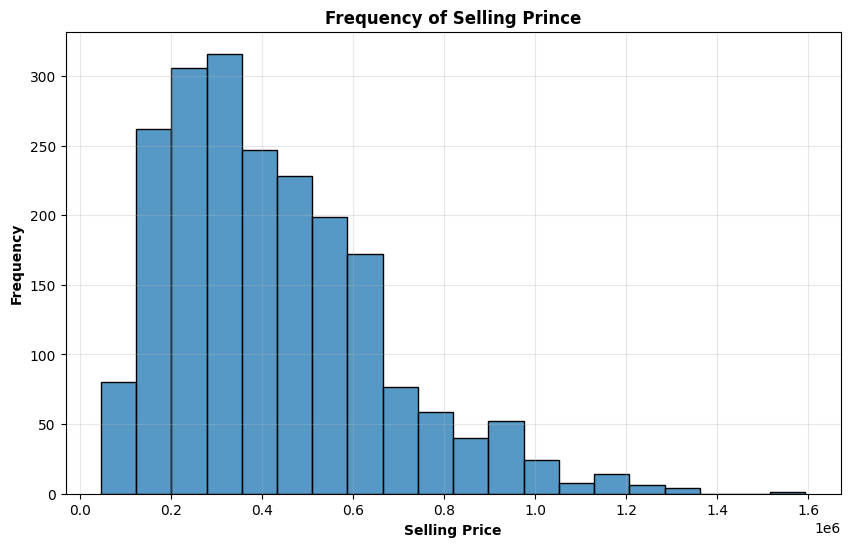

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='selling_price', bins=20)
plt.xlabel('Selling Price', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Frequency of Selling Prince', fontweight='bold')
plt.grid(True, alpha=.3)
plt.show()

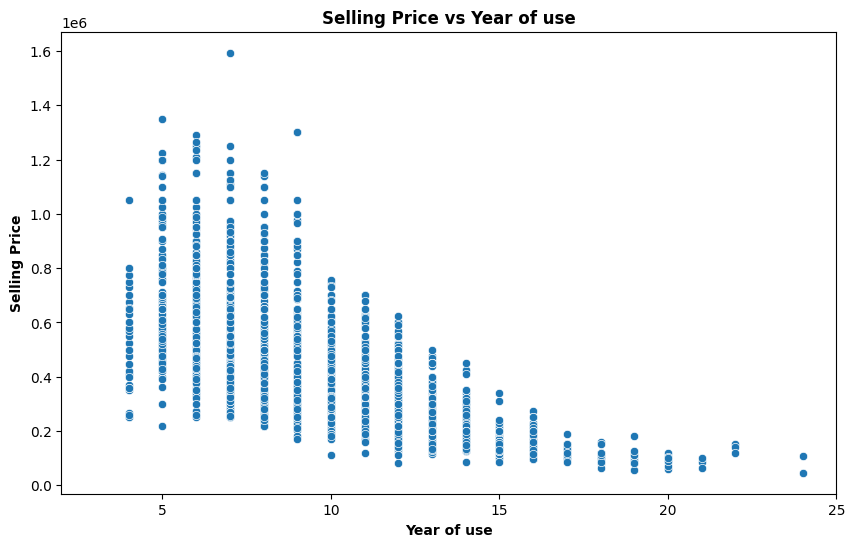

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='years_of_use', y='selling_price')
plt.xlabel('Year of use', fontweight='bold')
plt.ylabel('Selling Price', fontweight='bold')
plt.title('Selling Price vs Year of use', fontweight='bold')
plt.xlim(2, 25)
plt.show()

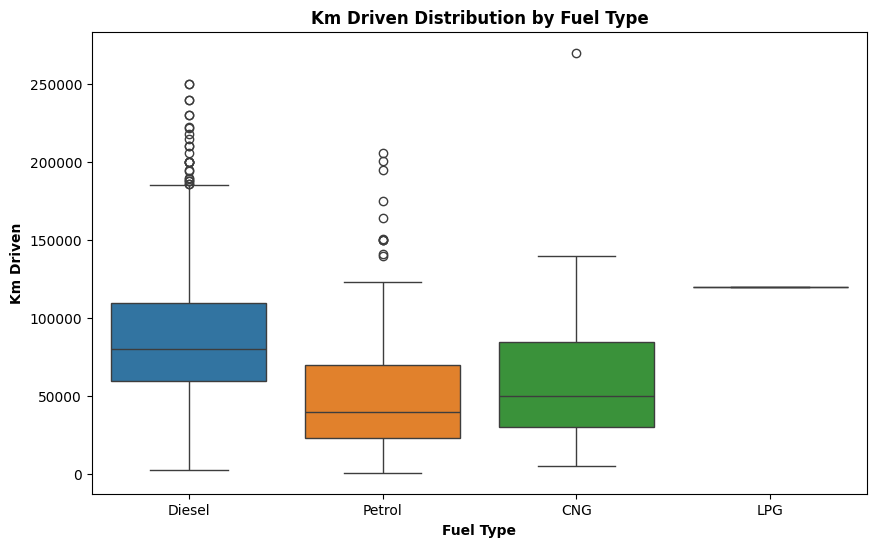

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='fuel', y='km_driven', hue='fuel')
plt.xlabel('Fuel Type', fontweight='bold')
plt.ylabel('Km Driven', fontweight='bold')
plt.title('Km Driven Distribution by Fuel Type', fontweight='bold')
plt.show()

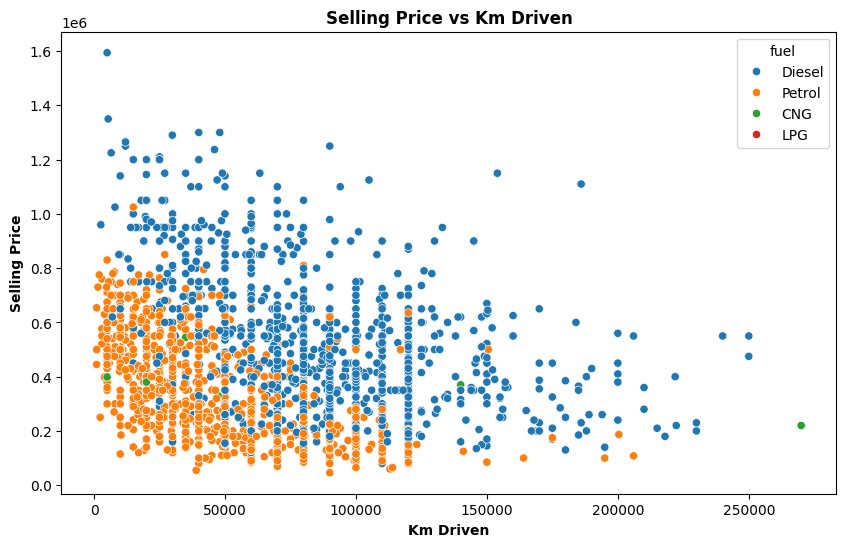

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='km_driven', y='selling_price', hue='fuel')
plt.xlabel('Km Driven', fontweight="bold")
plt.ylabel('Selling Price', fontweight='bold')
plt.title('Selling Price vs Km Driven', fontweight='bold')
plt.show()

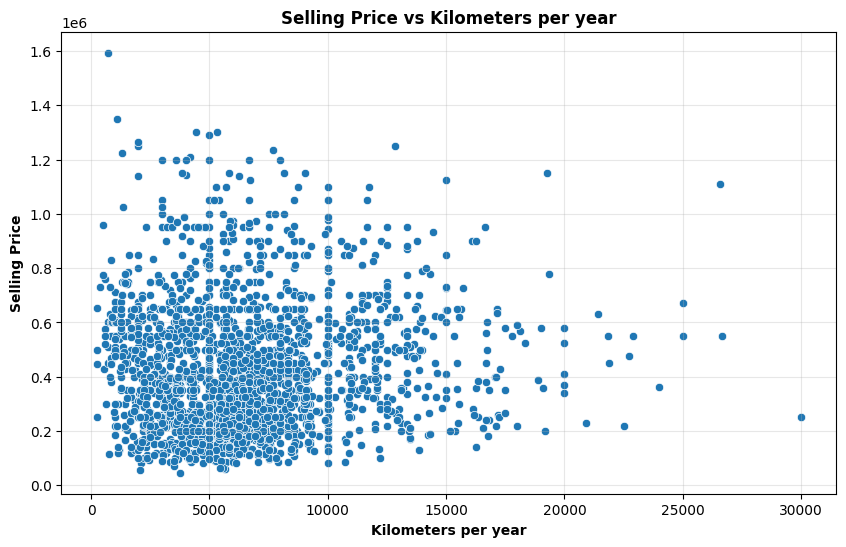

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='km_per_year', y='selling_price')
plt.xlabel('Kilometers per year', fontweight='bold')
plt.ylabel('Selling Price', fontweight='bold')
plt.title('Selling Price vs Kilometers per year', fontweight='bold')
plt.grid(True, alpha=.3)
plt.show()

# Preprocessing of the dataset

In [16]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC),years_of_use,km_per_year
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248,10,14550.000000
1,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396,14,9071.428571
2,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197,7,6428.571429
3,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364,13,6923.076923
4,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399,11,15363.636364


In [17]:
# Data scaling
numerical_features = ['km_driven', 'max_power (in bph)', 'Mileage', 'Engine (CC)', 'years_of_use', 'km_per_year']

scaler = MinMaxScaler()

for i in numerical_features:
    data[i] = scaler.fit_transform(np.array(data[i]).reshape(-1, 1))

data.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC),years_of_use,km_per_year
0,Maruti,2014,450000,0.537175,Diesel,Individual,Manual,First Owner,5,0.427070,kmpl,0.952381,0.640657,0.30,0.480934
1,Hyundai,2010,225000,0.468401,Diesel,Individual,Manual,First Owner,5,0.602278,kmpl,0.852130,0.792608,0.50,0.296873
2,Hyundai,2017,440000,0.163569,Petrol,Individual,Manual,First Owner,5,0.513141,kmpl,0.135338,0.588296,0.15,0.208082
3,Toyota,2011,350000,0.330855,Diesel,Individual,Manual,First Owner,5,0.351511,kmpl,1.000000,0.759754,0.45,0.224696
4,Ford,2013,200000,0.624535,Diesel,Individual,Manual,First Owner,5,0.362462,kmpl,0.100251,0.795688,0.35,0.508269


In [18]:
#Split between training data and test data
X = data[numerical_features].values
y = data['selling_price'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

# Machine Learning Models

## Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred_linear = model_lr.predict(X_test)

In [22]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_lr = r2_score(y_test, y_pred_linear)

In [23]:
print(f"RMSE: {rmse_lr:.2f}\nR2 SCORE: {r2_lr:.2f}")

RMSE: 125972.27
R2 SCORE: 0.70


## Polynomial Regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
error_list = []
r2_list = []
for i in range(1, 5):
    poly_features = PolynomialFeatures(degree=i, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)

    y_pred = model_poly.predict(X_test_poly)

    error = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_poly = r2_score(y_test, y_pred)

    error_list.append(error)
    r2_list.append(r2_poly)

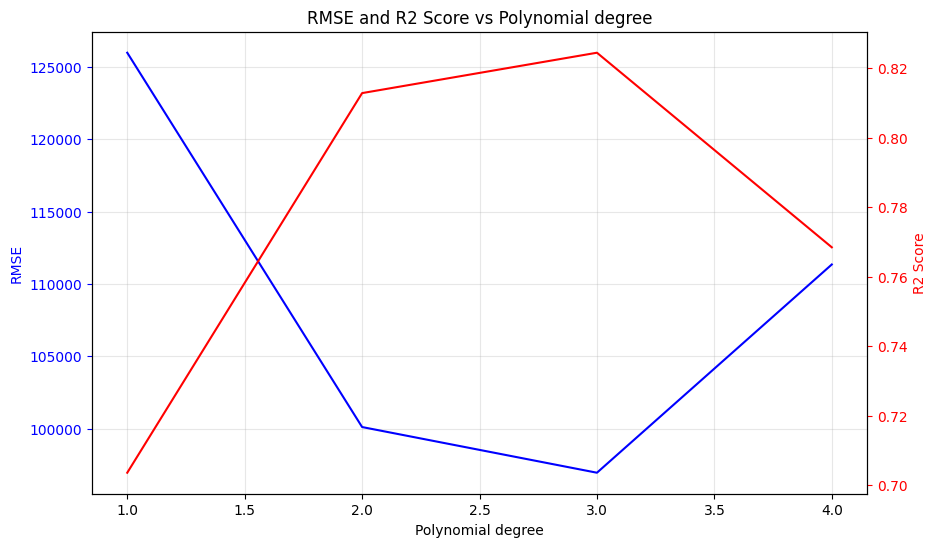

In [26]:
degree= list(range(1,5))

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(degree, error_list, color='b')

ax1.set_xlabel("Polynomial degree")
ax1.set_ylabel('RMSE', color='b')
ax1.tick_params('y', colors='b')
plt.grid(True, alpha=.3)

ax2 = ax1.twinx()

ax2.plot(degree, r2_list, 'r')
ax2.set_ylabel('R2 Score', color='r')
ax2.tick_params('y', colors='r')

plt.title("RMSE and R2 Score vs Polynomial degree")

plt.show()

According to the previous graph, the polynomial degree equal to 3 is the one that presents the lowest RMSE and the highest R2 score, that is, the one that comes closest to the real data, reducing the error.

In [27]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print(f"RMSE: {rmse_poly:.2f}\nR2 Score: {r2_poly:.2f}")

RMSE: 96949.35
R2 Score: 0.82


## Support Vector Machine

In [28]:
from sklearn.svm import SVR

In [29]:
rmse_svr_list = []
r2_svr_list = []
list_c = [1000, 10000, 30000, 50000, 100000, 150000, 200000, 300000, 400000, 500000]
for i in list_c:
    svr_model = SVR(kernel='rbf', C=i, epsilon=0.2)
    svr_model.fit(X_train, y_train)

    y_pred_svr = svr_model.predict(X_test)

    rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
    r2_svr = r2_score(y_test, y_pred_svr)

    rmse_svr_list.append(rmse_svr)
    r2_svr_list.append(r2_svr)

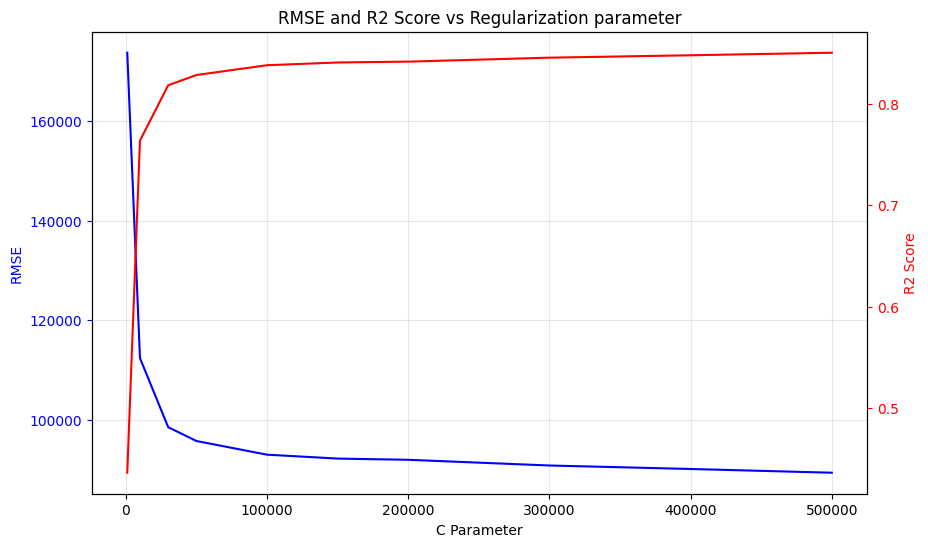

In [30]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(list_c, rmse_svr_list, color='b')

ax1.set_xlabel("C Parameter")
ax1.set_ylabel('RMSE', color='b')
ax1.tick_params('y', colors='b')
plt.grid(True, alpha=.3)

ax2 = ax1.twinx()

ax2.plot(list_c, r2_svr_list, 'r')
ax2.set_ylabel('R2 Score', color='r')
ax2.tick_params('y', colors='r')

plt.title("RMSE and R2 Score vs Regularization parameter")

plt.show()

In [31]:
# SVR model with optimized parameters
svr_model = SVR(kernel='rbf', C=500000, epsilon=0.2)
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"RMSE: {rmse_svr:.2f}\nR2 Score: {r2_svr:.2f}")

RMSE: 89394.10
R2 Score: 0.85


## KNN - K-nearest neighbors

In [32]:
rmse_knr_list = []
r2_knr_list = []

for i in range(1, 20):
    knr_model = KNeighborsRegressor(n_neighbors=i)
    knr_model.fit(X_train, y_train)

    y_pred_knr = knr_model.predict(X_test)

    rmse_knr = np.sqrt(mean_squared_error(y_test, y_pred_knr))
    r2_knr = r2_score(y_test, y_pred_knr)

    rmse_knr_list.append(rmse_knr)
    r2_knr_list.append(r2_knr)

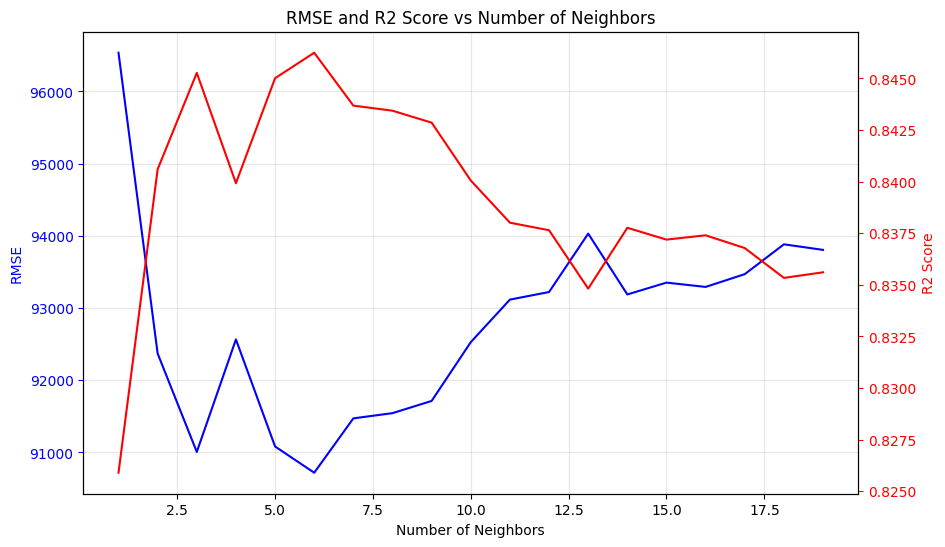

In [33]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(list(range(1,20)), rmse_knr_list, color='b')

ax1.set_xlabel("Number of Neighbors")
ax1.set_ylabel('RMSE', color='b')
ax1.tick_params('y', colors='b')
plt.grid(True, alpha=.3)

ax2 = ax1.twinx()

ax2.plot(list(range(1,20)), r2_knr_list, 'r')
ax2.set_ylabel('R2 Score', color='r')
ax2.tick_params('y', colors='r')

plt.title("RMSE and R2 Score vs Number of Neighbors")

plt.show()


In [34]:
# KNN model with optimized parameters
knr_model = KNeighborsRegressor(n_neighbors=6)
knr_model.fit(X_train, y_train)

y_pred_knr = knr_model.predict(X_test)

rmse_knr = np.sqrt(mean_squared_error(y_test, y_pred_knr))
r2_knr = r2_score(y_test, y_pred_knr)

print(f"RMSE: {rmse_knr:.2f}\nR2 Score: {r2_knr:.2f}")

RMSE: 90719.50
R2 Score: 0.85


## Decision Tree Regressor

In [36]:
rmse_dtr_list = []
r2_dtr_list = []

for i in range(1, 20):
    dtr_model = DecisionTreeRegressor(max_depth=i)
    dtr_model.fit(X_train, y_train)

    y_pred_dtr = dtr_model.predict(X_test)

    rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred_dtr))
    r2_dtr = r2_score(y_test, y_pred_dtr)

    rmse_dtr_list.append(rmse_dtr)
    r2_dtr_list.append(r2_dtr)

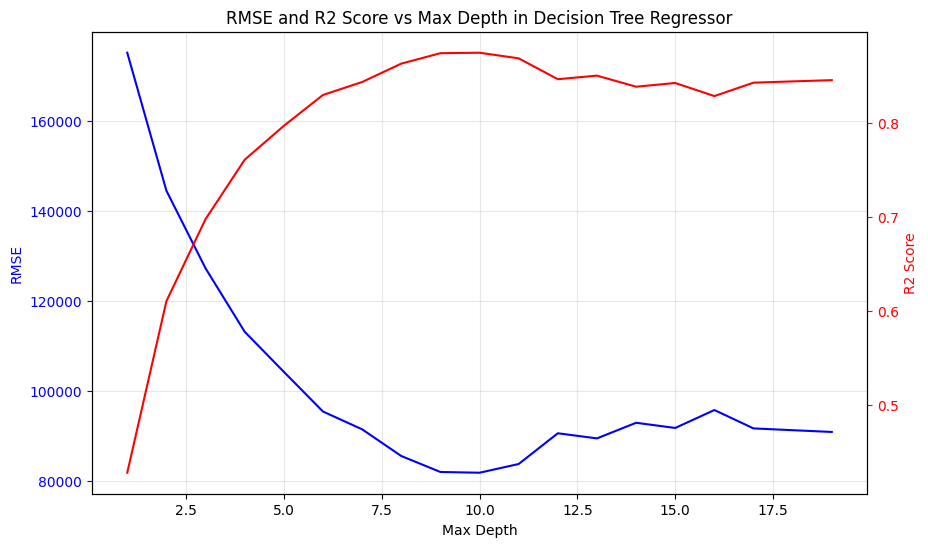

In [37]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(list(range(1,20)), rmse_dtr_list, color='b')

ax1.set_xlabel("Max Depth")
ax1.set_ylabel('RMSE', color='b')
ax1.tick_params('y', colors='b')
plt.grid(True, alpha=.3)

ax2 = ax1.twinx()

ax2.plot(list(range(1,20)), r2_dtr_list, 'r')
ax2.set_ylabel('R2 Score', color='r')
ax2.tick_params('y', colors='r')

plt.title("RMSE and R2 Score vs Max Depth in Decision Tree Regressor")

plt.show()

In [41]:
# Decision Tree model with optimized parameters
dtr_model = DecisionTreeRegressor(max_depth=np.argmax(r2_dtr_list)+1)
dtr_model.fit(X_train, y_train)

y_pred_dtr = dtr_model.predict(X_test)

rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred_dtr))
r2_dtr = r2_score(y_test, y_pred_dtr)

print(f"RMSE: {rmse_dtr:.2f}\nR2 Score: {r2_dtr:.2f}")

RMSE: 83532.21
R2 Score: 0.87


## Random Forest Regressor

In [44]:
rmse_rf_list = []
r2_rf_list = []

for i in range(1, 50):
    rf_model = RandomForestRegressor(n_estimators=i)
    rf_model.fit(X_train, y_train)

    y_pred_rf = rf_model.predict(X_test)

    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    r2_rf = r2_score(y_test, y_pred_rf)

    rmse_rf_list.append(rmse_rf)
    r2_rf_list.append(r2_rf)

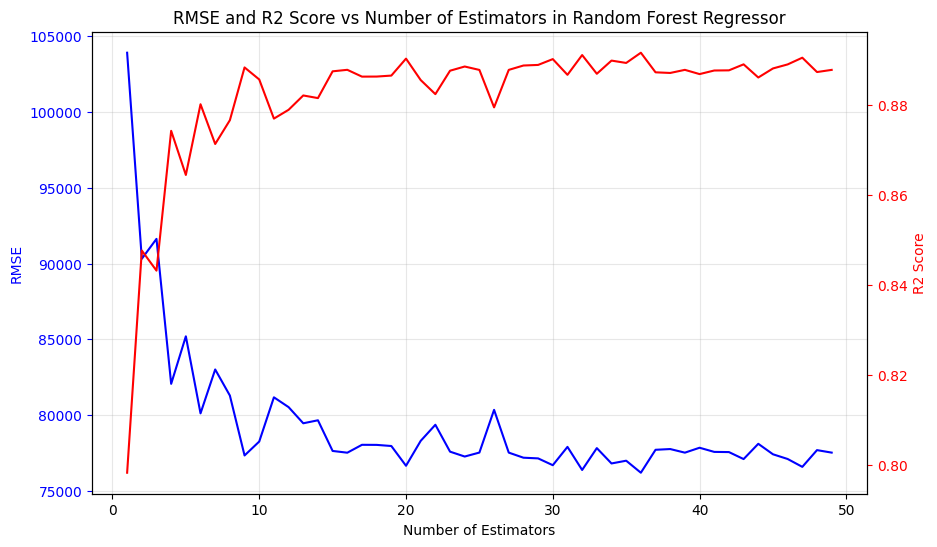

In [46]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(list(range(1,50)), rmse_rf_list, color='b')

ax1.set_xlabel("Number of Estimators")
ax1.set_ylabel('RMSE', color='b')
ax1.tick_params('y', colors='b')
plt.grid(True, alpha=.3)

ax2 = ax1.twinx()

ax2.plot(list(range(1,50)), r2_rf_list, 'r')
ax2.set_ylabel('R2 Score', color='r')
ax2.tick_params('y', colors='r')

plt.title("RMSE and R2 Score vs Number of Estimators in Random Forest Regressor")

plt.show()

In [48]:
# Random Forest model with optimized parameters
rf_model = RandomForestRegressor(n_estimators=np.argmax(r2_rf_list)+1)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RMSE: {rmse_rf:.2f}\nR2 Score: {r2_rf:.2f}")

RMSE: 77927.45
R2 Score: 0.89


# Results of the models

| Metrics | Linear Reg | Poly Reg | SVM | KNN | Decision Tree | Random Forest |
|---------|------------|----------|-----|-----|---------------|---------------|
|   RMSE  | 125,972.27 | 96,949.35 | 89,394.10 | 90,719.50 | 83,532.21 | 77,927.45 |
|R2 Score |    0.70    | 0.82 | 0.85 | 0.85 | 0.87 | 0.89 |

Then, we can conclude that the model that came closest to the behavior of real data and consequently, obtained the lowest error was the **Random Forest model**.